In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Basic Libraries

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


# Defining the Needed Properties for Preprocessing

In [3]:
# Define Constants
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Loading Train Data


In [4]:
filenames = os.listdir("/content/drive/MyDrive/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
train_df.head()


,filename,category
0,Non_Autistic.1217.jpg,0
1,Non_Autistic.1030.jpg,0
2,Non_Autistic.180.jpg,0
3,Non_Autistic.119.jpg,0
4,Autistic.914.jpg,1


In [6]:
train_df.tail()


,filename,category
2545,Autistic.202.jpg,1
2546,Autistic.433.jpg,1
2547,Autistic.40.jpg,1
2548,Autistic.290.jpg,1
2549,Autistic.539.jpg,1


# Plotting Train Data

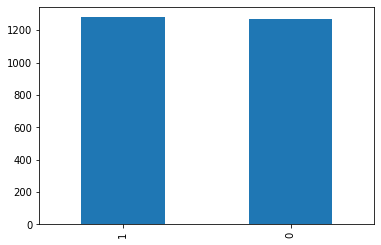

In [7]:
train_df['category'].value_counts().plot.bar()


In [8]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})

In [9]:
test_df.head()


,filename,category
0,Autistic.42.jpg,1
1,Autistic.148.jpg,1
2,Autistic.51.jpg,1
3,Autistic.106.jpg,1
4,Autistic.56.jpg,1


In [10]:
test_df.tail()

,filename,category
295,Non_Autistic.53.jpg,0
296,Non_Autistic.73.jpg,0
297,Autistic.91.jpg,1
298,Non_Autistic.47.jpg,0
299,Non_Autistic.144.jpg,0


# Plotting Test Data

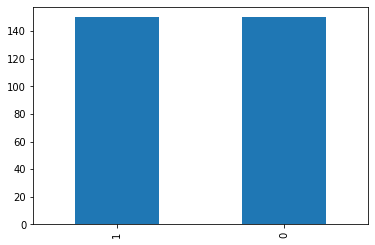

In [11]:
test_df['category'].value_counts().plot.bar()

# Loading Random Images From The Dataset


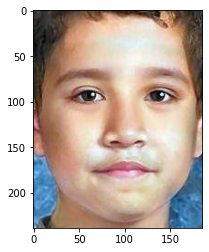

In [12]:
# See Sample Image
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/AutismDataset/train/"+sample)
plt.imshow(image)

In [13]:
valid_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/valid")
categories = []
for filename in valid_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

valid_df = pd.DataFrame({
    'filename': valid_filenames,
    'category': categories
})

In [14]:
valid_df.head()


,filename,category
0,Non_Autistic. (9).jpg,0
1,Autistic. (19).jpg,1
2,Autistic. (7).jpg,1
3,Autistic. (38).jpg,1
4,Non_Autistic. (4).jpg,0


In [15]:
valid_df.tail()

,filename,category
95,Non_Autistic. (30).jpg,0
96,Non_Autistic. (37).jpg,0
97,Non_Autistic. (50).jpg,0
98,Non_Autistic. (49).jpg,0
99,Non_Autistic. (33).jpg,0


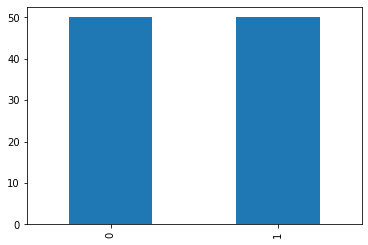

In [16]:
valid_df['category'].value_counts().plot.bar()

In [17]:
train_df["category"] = train_df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'}) 

In [18]:
test_df["category"] = test_df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'}) 

In [19]:
valid_df["category"] = valid_df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'}) 

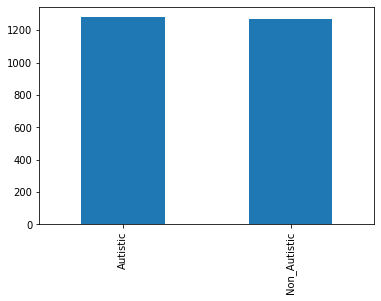

In [20]:
train_df['category'].value_counts().plot.bar()

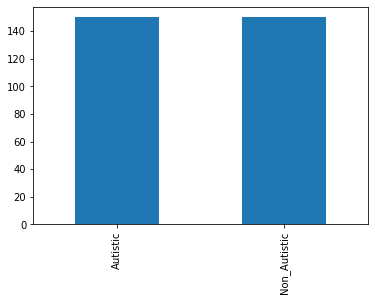

In [21]:
test_df['category'].value_counts().plot.bar()

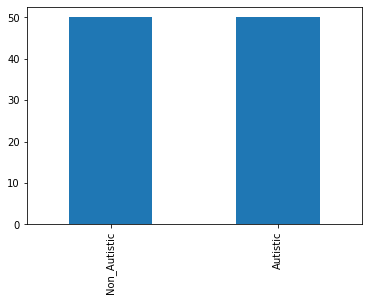

In [22]:
valid_df['category'].value_counts().plot.bar()

# Building The Model

In [23]:
# Build Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [25]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Early Stop for the callbacks

In [26]:
# earlystop = EarlyStopping(patience=10)

# Learning Rate Reduction

In [27]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

In [28]:
# callbacks = [earlystop, learning_rate_reduction]


# Preparing the data

# Spliting the Train and Test Data

In [29]:
train_df, validate_df = train_test_split(train_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [30]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Creating Training Generator For Train Images

In [31]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2040 validated image filenames belonging to 2 classes.


# Creating Validation Generator For Test Images

In [32]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 510 validated image filenames belonging to 2 classes.


# Fitting The Model

In [33]:
#Fit Model
epochs=40
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
136/136 [==============================] - 35s 179ms/step - loss: 1.1191 - accuracy: 0.6034 - val_loss: 2.8567 - val_accuracy: 0.4902
Epoch 2/40
136/136 [==============================] - 20s 146ms/step - loss: 0.8132 - accuracy: 0.6382 - val_loss: 2.1210 - val_accuracy: 0.4902
Epoch 3/40
136/136 [==============================] - 20s 145ms/step - loss: 0.7732 - accuracy: 0.6152 - val_loss: 0.9041 - val_accuracy: 0.5039
Epoch 4/40
136/136 [==============================] - 22s 160ms/step - loss: 0.6792 - accuracy: 0.6397 - val_loss: 0.6140 - val_accuracy: 0.6765
Epoch 5/40
136/136 [==============================] - 20s 144ms/step - loss: 0.6388 - accuracy: 0.6725 - val_loss: 0.5742 - val_accuracy: 0.7000
Epoch 6/40
136/136 [==============================] - 20s 145ms/step - loss: 0.6127 - accuracy: 0.6804 - val_loss: 0.5994 - val_accuracy: 0.6627
Epoch 7/40
136/136 [==============================] - 20s 145ms/step - loss: 0.5924 - accuracy: 0.7020 - val_loss: 0.5536 - val_ac

# Accuracy and Loss on Test Data

In [50]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test: accuracy = 0.739216  ;  loss = 0.614876 


# Saving The Model

In [35]:
model.save("CNN.h5")


# Ploting the Loss And Accuracy

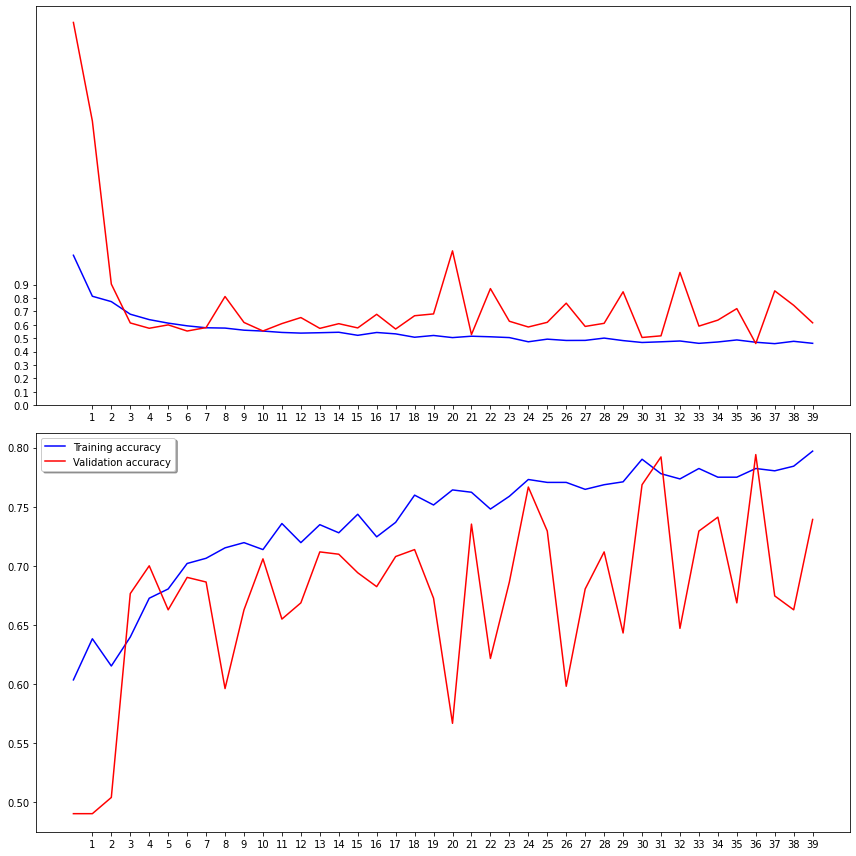

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Preparing Testing Data

In [37]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Creating Testing Generator

In [38]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/AutismDataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 300 validated image filenames.


# Predicting on Test Data


In [39]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[9.51941013e-01, 4.80590276e-02],
       [7.47972906e-01, 2.52027094e-01],
       [7.42475092e-01, 2.57524967e-01],
       [6.09074056e-01, 3.90925914e-01],
       [2.94843853e-01, 7.05156147e-01],
       [1.69792324e-01, 8.30207705e-01],
       [9.55469787e-01, 4.45302241e-02],
       [8.69178534e-01, 1.30821511e-01],
       [9.54364181e-01, 4.56358232e-02],
       [7.66516984e-01, 2.33483002e-01],
       [5.79257965e-01, 4.20741975e-01],
       [7.53986716e-01, 2.46013299e-01],
       [2.52279621e-02, 9.74771976e-01],
       [8.33989203e-01, 1.66010737e-01],
       [6.58214688e-02, 9.34178472e-01],
       [7.90341377e-01, 2.09658667e-01],
       [7.69284487e-01, 2.30715513e-01],
       [8.35097373e-01, 1.64902642e-01],
       [8.13350260e-01, 1.86649770e-01],
       [5.72124347e-02, 9.42787588e-01],
       [6.96572900e-01, 3.03427100e-01],
       [7.86819458e-01, 2.13180512e-01],
       [5.82053840e-01, 4.17946130e-01],
       [2.73292243e-01, 7.26707757e-01],
       [3.497058

In [40]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category']

0      0
1      0
2      0
3      0
4      1
      ..
295    1
296    1
297    1
298    1
299    1
Name: category, Length: 300, dtype: int64

In [41]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category']

0          Autistic
1          Autistic
2          Autistic
3          Autistic
4      Non_Autistic
           ...     
295    Non_Autistic
296    Non_Autistic
297    Non_Autistic
298    Non_Autistic
299    Non_Autistic
Name: category, Length: 300, dtype: object

In [42]:
test_df['category'] = test_df['category'].replace({ 'Autistic': 1, 'Non_Autistic': 0 })
test_df['category']

0      1
1      1
2      1
3      1
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Name: category, Length: 300, dtype: int64

# Virtaulize Result


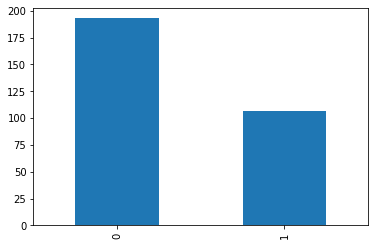

In [43]:
test_df['category'].value_counts().plot.bar()

# See The Predicted Result on Test Data

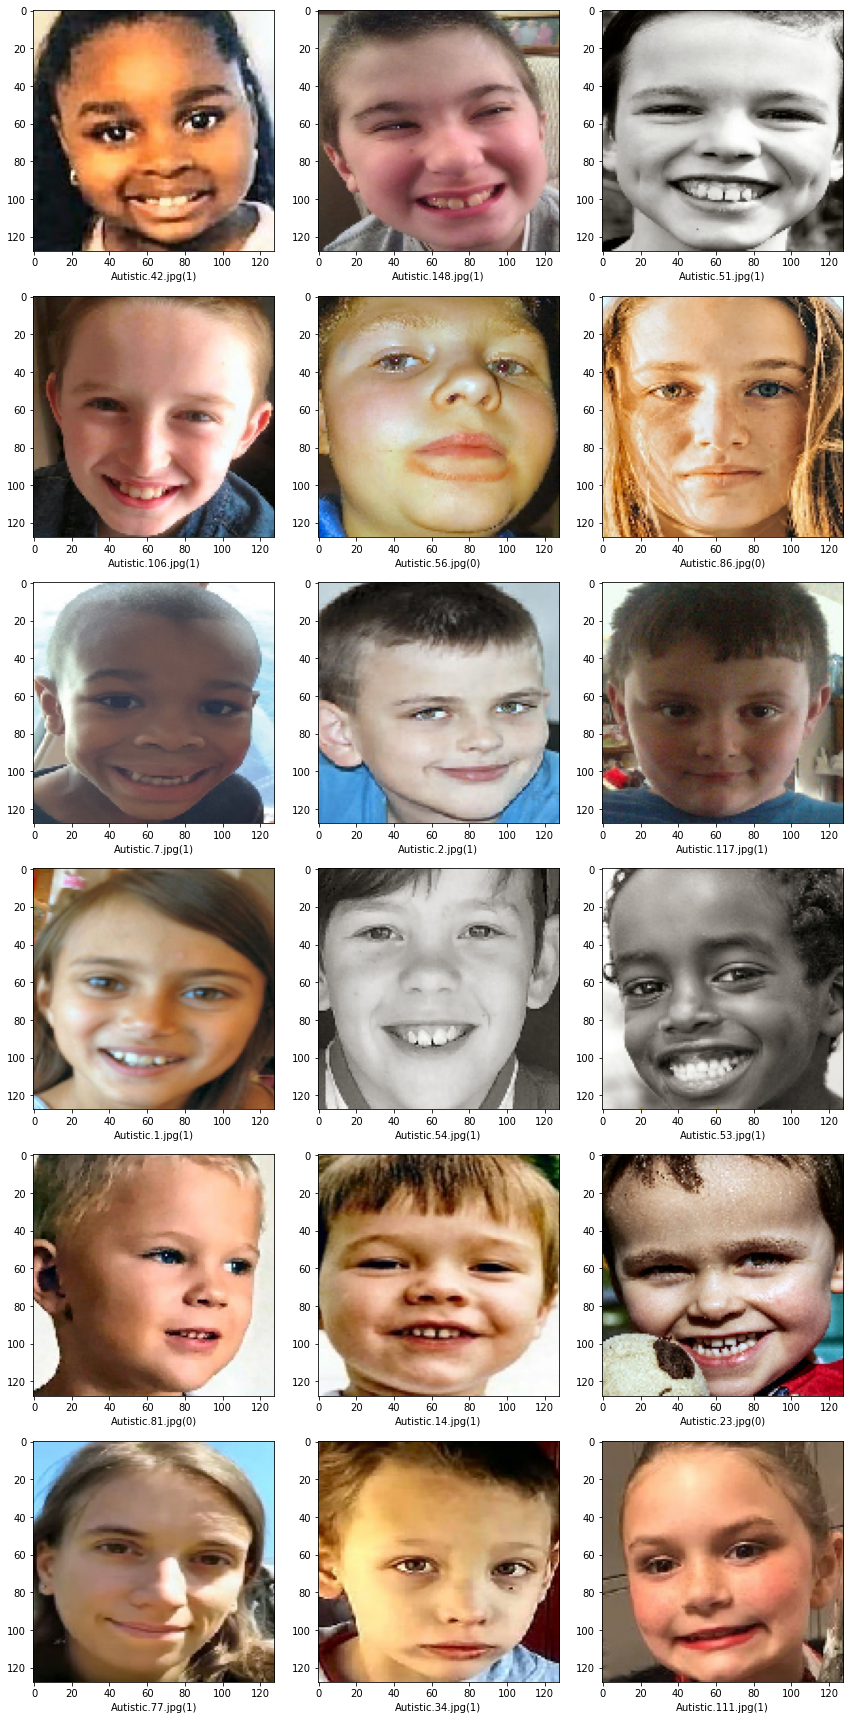

In [44]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/AutismDataset/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

# Creating Testing Images Outside the Dataset to Predict The Result

In [45]:
test_filenames2 = os.listdir("/content/drive/MyDrive/Predictions")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
nb_samples = test_df2.shape[0]

# Creating Test Generator  for the Images To Predict

In [46]:
test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen2.flow_from_dataframe(
    test_df2, 
    "/content/drive/MyDrive/Predictions", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 21 validated image filenames.


# Predictions On The Images

In [47]:
predict2 = model.predict_generator(test_generator2, steps=np.ceil(nb_samples/batch_size))
predict2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[4.05986458e-01, 5.94013512e-01],
       [2.05896050e-02, 9.79410410e-01],
       [3.56341130e-03, 9.96436596e-01],
       [3.07198288e-03, 9.96928036e-01],
       [1.32277504e-01, 8.67722452e-01],
       [1.31299123e-02, 9.86870110e-01],
       [6.31384254e-01, 3.68615776e-01],
       [4.11421545e-02, 9.58857834e-01],
       [2.10068509e-01, 7.89931476e-01],
       [7.99802125e-01, 2.00197905e-01],
       [1.40543222e-01, 8.59456837e-01],
       [5.28692566e-02, 9.47130740e-01],
       [5.18434048e-01, 4.81565922e-01],
       [1.89428568e-01, 8.10571432e-01],
       [5.00470817e-01, 4.99529153e-01],
       [1.31876275e-01, 8.68123710e-01],
       [5.34399115e-02, 9.46560144e-01],
       [2.95050500e-04, 9.99704897e-01],
       [9.47903872e-01, 5.20961843e-02],
       [1.04485616e-01, 8.95514369e-01],
       [6.07574046e-01, 3.92425925e-01]], dtype=float32)

# Printing The Results

In [48]:
test_df2['category'] = np.argmax(predict2, axis=-1)
test_df2['category']

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    0
19    1
20    0
Name: category, dtype: int64

In [49]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df2['category'] = test_df2['category'].replace(label_map)
test_df2['category']

0     Non_Autistic
1     Non_Autistic
2     Non_Autistic
3     Non_Autistic
4     Non_Autistic
5     Non_Autistic
6         Autistic
7     Non_Autistic
8     Non_Autistic
9         Autistic
10    Non_Autistic
11    Non_Autistic
12        Autistic
13    Non_Autistic
14        Autistic
15    Non_Autistic
16    Non_Autistic
17    Non_Autistic
18        Autistic
19    Non_Autistic
20        Autistic
Name: category, dtype: object